In [6]:
# Project 2: Titanic Survival Analysis
## Name: Brandon   
### Date: 2025-11-2  

#### This notebook applies the ML workflow from Project 1 to the Titanic dataset. We will load, inspect, clean, engineer features, and prepare the data for modeling.


In [7]:
# 0. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')


In [8]:
# 1. Import and Inspect the Data

try:
    titanic = sns.load_dataset("titanic")
    print("✅ Loaded Titanic dataset from seaborn.")
except Exception:
    print("⚠️ Could not load from seaborn, loading local CSV instead...")
    titanic = pd.read_csv("titanic.csv")

print("\nShape:", titanic.shape)
print("\nColumns:", titanic.columns.tolist())

print("\n--- .info() ---")
titanic.info()

print("\n--- Head(10) ---")
print(titanic.head(10))

print("\n--- Missing values ---")
print(titanic.isnull().sum())

print("\n--- Describe ---")
print(titanic.describe())

print("\n--- Correlations (numeric only) ---")
print(titanic.corr(numeric_only=True))


⚠️ Could not load from seaborn, loading local CSV instead...

Shape: (891, 15)

Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive   

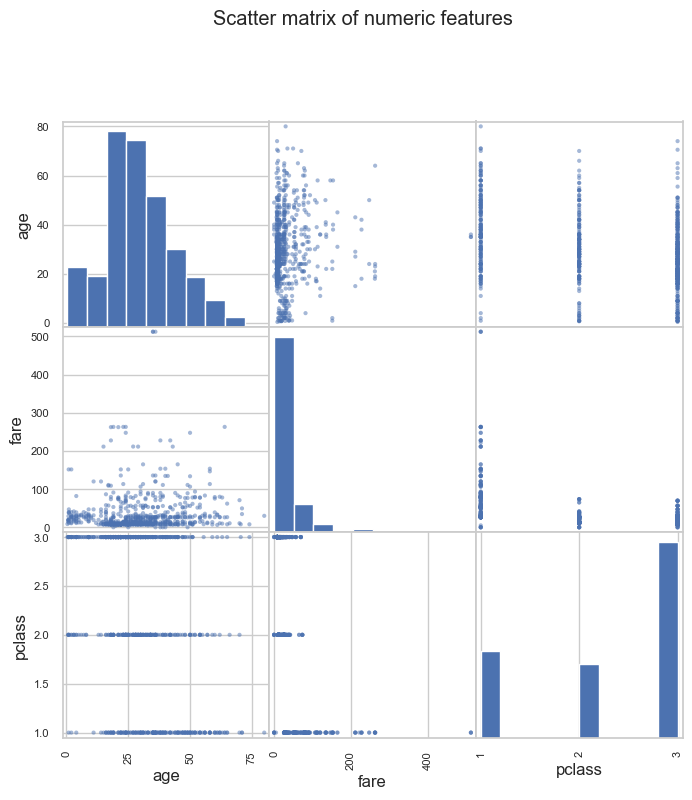

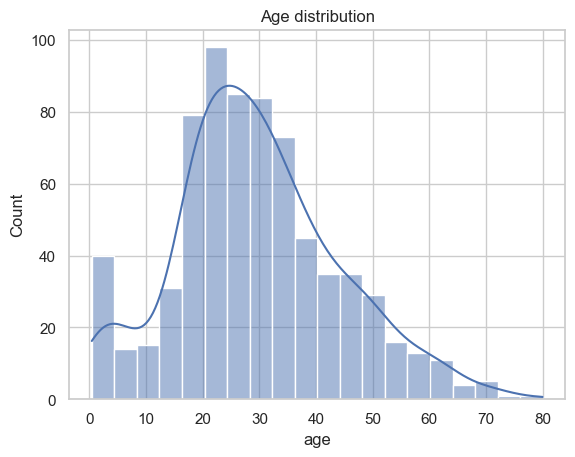

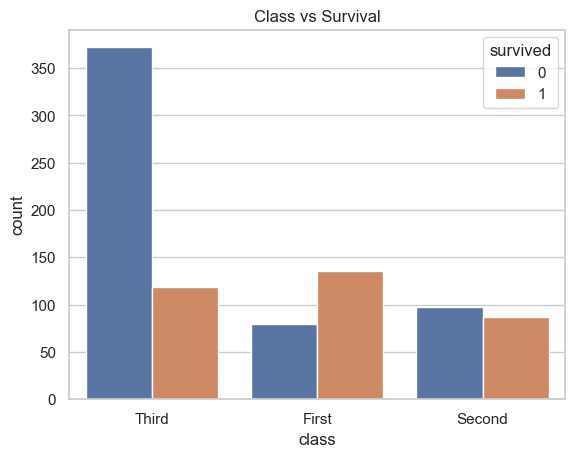

✅ Data cleaned and features engineered.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,0,2
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,0,2
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,1,1
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,0,2
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,1,1


In [9]:
# 2. Data Exploration and Preparation

# 2.1 visual exploration
numeric_attrs = ['age', 'fare', 'pclass']
scatter_matrix(titanic[numeric_attrs], figsize=(8, 8))
plt.suptitle("Scatter matrix of numeric features", y=1.02)
plt.show()

sns.histplot(titanic['age'], kde=True)
plt.title("Age distribution")
plt.show()

sns.countplot(x='class', hue='survived', data=titanic)
plt.title("Class vs Survival")
plt.show()

# 2.2 clean / missing
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic = titanic.drop(columns=['deck'], errors='ignore')

# 2.3 feature engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

print("✅ Data cleaned and features engineered.")
titanic.head()


In [10]:
# 3. Feature Selection and Justification
features = ['age', 'fare', 'pclass', 'sex', 'family_size']
target = 'survived'

X = titanic[features].copy()
y = titanic[target].copy()

print("Features:", features)
print("Target:", target)
print("X shape:", X.shape)
print("y shape:", y.shape)


Features: ['age', 'fare', 'pclass', 'sex', 'family_size']
Target: survived
X shape: (891, 5)
y shape: (891,)


In [11]:
# 4. Train/Test Splitting

# simple split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print("Simple split:")
print("Train:", len(X_train), "Test:", len(X_test))

# stratified split by target
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx, test_idx in splitter.split(X, y):
    X_train_strat = X.iloc[train_idx]
    X_test_strat = X.iloc[test_idx]
    y_train_strat = y.iloc[train_idx]
    y_test_strat = y.iloc[test_idx]

print("\nStratified split:")
print("Train:", len(X_train_strat), "Test:", len(X_test_strat))

print("\nOriginal class distribution:")
print(y.value_counts(normalize=True))

print("\nStratified train distribution:")
print(y_train_strat.value_counts(normalize=True))

print("\nStratified test distribution:")
print(y_test_strat.value_counts(normalize=True))



Simple split:
Train: 712 Test: 179

Stratified split:
Train: 712 Test: 179

Original class distribution:
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Stratified train distribution:
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Stratified test distribution:
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64
